In [27]:
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Định nghĩa đường dẫn file trên Kaggle
file_path = '/kaggle/input/course/course.json'

# Bước 1: Đọc dữ liệu từ file JSON Lines
if os.path.exists(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                data.append(json.loads(line.strip()))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in line: {line}")
                print(e)
    if data:
        df = pd.DataFrame(data)
        print("Dữ liệu đã được tải thành công từ:", file_path)
        print("\nDữ liệu ban đầu:")
        print(df.head())
    else:
        print("Không có dữ liệu hợp lệ trong tệp.")
        exit()
else:
    print("File không tồn tại trong đường dẫn:", file_path)
    exit()



Dữ liệu đã được tải thành công từ: /kaggle/input/course/course.json

Dữ liệu ban đầu:
         id            name                    field prerequisites  \
0  C_584313        《资治通鉴》导读            [历史学, 中国语言文学]                 
1  C_584329  微积分——极限理论与一元函数  [应用经济学, 数学, 物理学, 理论经济学]                 
2  C_584381            新闻摄影             [艺术学, 新闻传播学]                 
3  C_597208      数据挖掘：理论与算法               [计算机科学与技术]                 
4  C_597225           大学计算机                       []                 

                                               about  \
0      通过老师导读，同学们可深入这一经典文本内部，得以纵览千年历史，提升国学素养，体味人生智慧。   
1  本课程是理工科的一门数学基础课，系统、全面地介绍了一元函数微积分学。课程既保持了数学的严谨和...   
2  掌握基本的摄影技能，了解图片新闻的工作方式，训练对生活的观察和热爱，发展对图像的审美和批评能...   
3                           最有趣的理论+最有用的算法=不得不学的数据科学。   
4  大学计算机课程将以计算思维为导向，以计算机原理、概念为基础，以新技术新方法为牵引，以创新思维...   

                                            resource  
0  [{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso...  
1  [{'titles': ['序言', '序言', '序言'], 'resource_i

In [28]:
df.head(10) 

,id,name,field,prerequisites,about,resource
0,C_584313,《资治通鉴》导读,"[历史学, 中国语言文学]",,通过老师导读，同学们可深入这一经典文本内部，得以纵览千年历史，提升国学素养，体味人生智慧。,"[{'titles': ['第一课 导论与三家分晋', '导论', '导论'], 'reso..."
1,C_584329,微积分——极限理论与一元函数,"[应用经济学, 数学, 物理学, 理论经济学]",,本课程是理工科的一门数学基础课，系统、全面地介绍了一元函数微积分学。课程既保持了数学的严谨和...,"[{'titles': ['序言', '序言', '序言'], 'resource_id':..."
2,C_584381,新闻摄影,"[艺术学, 新闻传播学]",,掌握基本的摄影技能，了解图片新闻的工作方式，训练对生活的观察和热爱，发展对图像的审美和批评能...,"[{'titles': ['第一章 绪论', '第一讲 引言1', '引言1'], 'res..."
3,C_597208,数据挖掘：理论与算法,[计算机科学与技术],,最有趣的理论+最有用的算法=不得不学的数据科学。,"[{'titles': ['走进数据科学：博大精深，美不胜收', '整装待发', 'Vide..."
4,C_597225,大学计算机,[],,大学计算机课程将以计算思维为导向，以计算机原理、概念为基础，以新技术新方法为牵引，以创新思维...,"[{'titles': ['第1周： 基于计算机的问题求解', '课程介绍', '开篇'],..."
5,C_597229,财务分析与决策,"[应用经济学, 管理科学与工程]",,这门课程用财务语言解构企业的价值创造过程，从而帮助学习者理解影响价值创造的各种因素，建立财务...,"[{'titles': ['资金的运用——认识资产', '1.1 绪论', '绪论'], '..."
6,C_597291,高级英语写作,[],,本课程能够帮助学生掌握英语段落、短文、图表作文、应用文的写作方法和技巧，学习地道、规范的学术...,"[{'titles': ['Chapter One Paragraph Writing', ..."
7,C_597307,大唐兴衰,[历史学],,隋唐五代史是史学名著《资治通鉴》中分量最重、史料价值最高的部分。通过老师导读，同学们可深入经...,"[{'titles': ['第一课、隋朝开基', '第一节 隋帝杨坚', '第一节 隋帝杨坚..."
8,C_597365,五分钟轻松搞定职场礼仪（2019春）,[],,职场“礼”为先，成功的未来不是梦！,"[{'titles': ['课程介绍动画：职场“礼”为先，成功的未来不是梦', '课程介绍动..."
9,C_597367,时尚化妆造型（2018秋）,[],,针对爱美人士讲解时尚生活、新娘和商业化妆造型基本原理及方法，使其能快速掌握现在时尚流行妆容造...,"[{'titles': ['第一章 化妆基础', '1.1 化妆品与化妆工具', 'Vide..."


In [29]:
df.shape

(3781, 6)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3781 non-null   object
 1   name           3781 non-null   object
 2   field          3781 non-null   object
 3   prerequisites  3779 non-null   object
 4   about          3779 non-null   object
 5   resource       3781 non-null   object
dtypes: object(6)
memory usage: 177.4+ KB


In [31]:
# Kiểm tra giá trị thiếu
print("\nGiá trị thiếu trong dữ liệu:")
print(df.isnull().sum())


Giá trị thiếu trong dữ liệu:
id               0
name             0
field            0
prerequisites    2
about            2
resource         0
dtype: int64


In [32]:
# Bước 2: Làm sạch dữ liệu trước khi phân tích
# Xử lý giá trị None hoặc rỗng trong cột 'about'
df['about'] = df['about'].fillna("")  # Thay None bằng chuỗi rỗng
df['prerequisites'] = df['prerequisites'].fillna("Không có")  # Thay None bằng "Không có"

# Kiểm tra giá trị thiếu
print("\nGiá trị thiếu trong dữ liệu:")
print(df.isnull().sum())


Giá trị thiếu trong dữ liệu:
id               0
name             0
field            0
prerequisites    0
about            0
resource         0
dtype: int64


In [33]:
# Bước 3: Tính toán các thống kê cơ bản
# Tính số lượng tài nguyên cho mỗi khóa học
df['num_resources'] = df['resource'].apply(len)

# Tính độ dài của mô tả (about)
df['about_length'] = df['about'].apply(len)  # Bây giờ sẽ không có lỗi vì None đã được thay

# Tính thống kê cho các cột số
print("\nThống kê cơ bản cho số lượng tài nguyên:")
print(df['num_resources'].describe())
print("\nThống kê cơ bản cho độ dài mô tả:")
print(df['about_length'].describe())

# Tính trung vị và độ lệch chuẩn
print("\nTrung vị số lượng tài nguyên:", df['num_resources'].median())
print("Độ lệch chuẩn số lượng tài nguyên:", df['num_resources'].std())
print("Trung vị độ dài mô tả:", df['about_length'].median())
print("Độ lệch chuẩn độ dài mô tả:", df['about_length'].std())



Thống kê cơ bản cho số lượng tài nguyên:
count    3781.000000
mean       71.685533
std        74.802345
min         1.000000
25%        38.000000
50%        59.000000
75%        88.000000
max      2728.000000
Name: num_resources, dtype: float64

Thống kê cơ bản cho độ dài mô tả:
count    3781.000000
mean      121.144142
std       100.863319
min         0.000000
25%        66.000000
50%        98.000000
75%       142.000000
max       512.000000
Name: about_length, dtype: float64

Trung vị số lượng tài nguyên: 59.0
Độ lệch chuẩn số lượng tài nguyên: 74.80234466137358
Trung vị độ dài mô tả: 98.0
Độ lệch chuẩn độ dài mô tả: 100.86331896103769


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


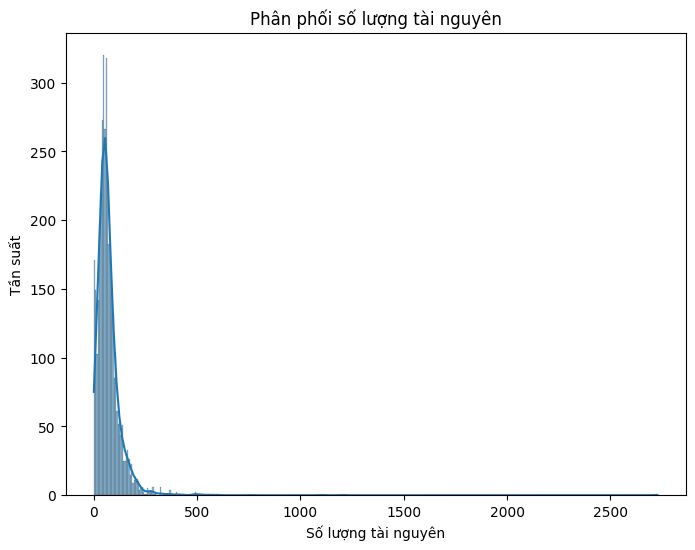

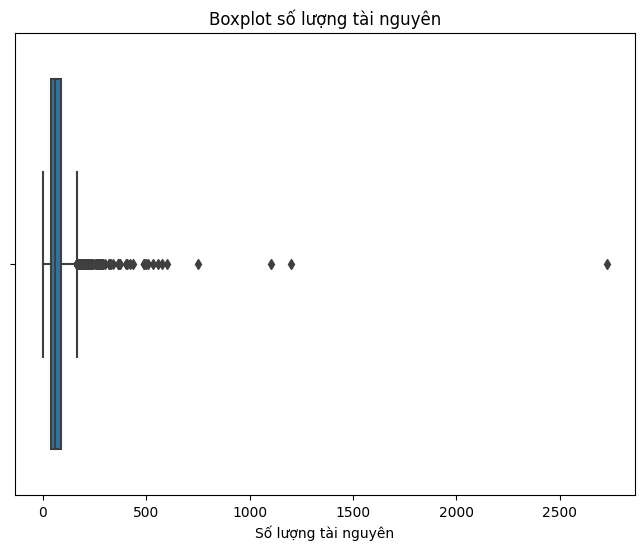

In [34]:
# Bước 4: Phân tích phân phối dữ liệu
# Histogram cho số lượng tài nguyên
plt.figure(figsize=(8, 6))
sns.histplot(df['num_resources'], kde=True)
plt.title('Phân phối số lượng tài nguyên')
plt.xlabel('Số lượng tài nguyên')
plt.ylabel('Tần suất')
plt.show()

# Boxplot cho số lượng tài nguyên
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['num_resources'])
plt.title('Boxplot số lượng tài nguyên')
plt.xlabel('Số lượng tài nguyên')
plt.show()

In [35]:
# Bước 5: Xác định giá trị ngoại lai (outliers)
Q1 = df['num_resources'].quantile(0.25)
Q3 = df['num_resources'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['num_resources'] < lower_bound) | (df['num_resources'] > upper_bound)]
print("\nCác khóa học có số lượng tài nguyên ngoại lai:")
print(outliers[['id', 'name', 'num_resources']])


Các khóa học có số lượng tài nguyên ngoại lai:
             id                              name  num_resources
1      C_584329                    微积分——极限理论与一元函数            170
4      C_597225                             大学计算机            165
19     C_654551                         系列课测试4-zm            340
20     C_654504                         系列课测试1-zm            226
28     C_597314                   大学国文——北宋至现代文学赏析            186
...         ...                               ...            ...
3643  C_2316362             University physics（1）            199
3759  C_2342532  Fundamentals of Circuit Analysis            204
3765  C_2338031                        （疾风计划）操作系统            207
3766  C_2337981                     （疾风计划）数据结构(上)            280
3778  C_2337996                     （疾风计划）数据结构(下)            324

[209 rows x 3 columns]


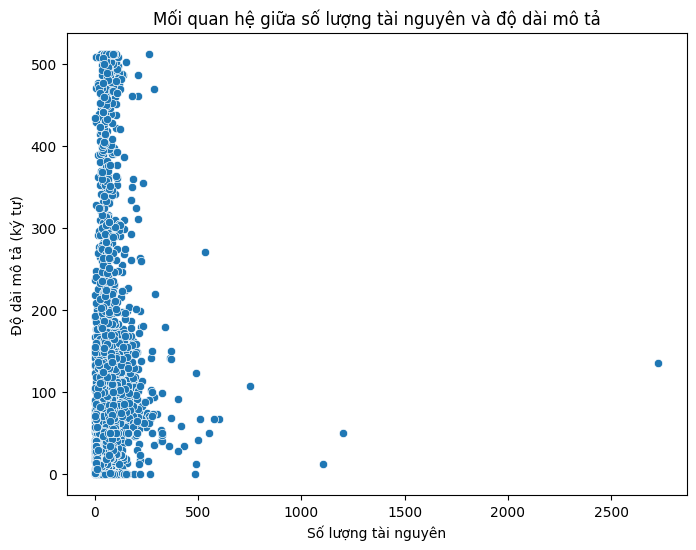

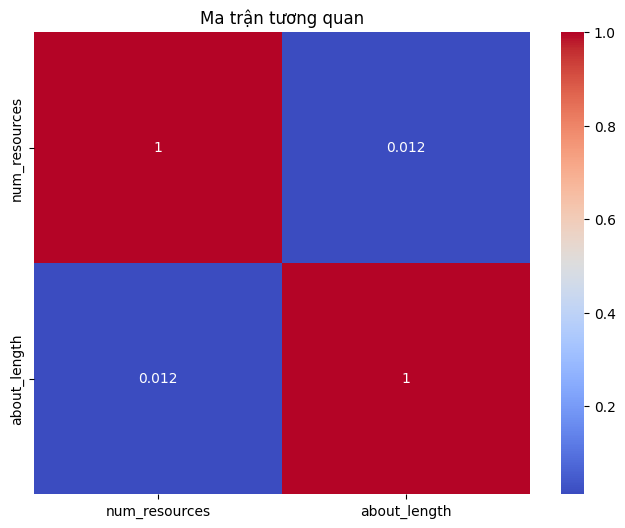

In [36]:
# Bước 6: Thể hiện mối quan hệ giữa các biến
# Scatter plot giữa số lượng tài nguyên và độ dài mô tả
plt.figure(figsize=(8, 6))
sns.scatterplot(x='num_resources', y='about_length', data=df)
plt.title('Mối quan hệ giữa số lượng tài nguyên và độ dài mô tả')
plt.xlabel('Số lượng tài nguyên')
plt.ylabel('Độ dài mô tả (ký tự)')
plt.show()

# Heatmap cho ma trận tương quan
plt.figure(figsize=(8, 6))
corr = df[['num_resources', 'about_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

In [37]:
# Bước 7: Kiểm định thống kê
# So sánh số lượng tài nguyên giữa các khóa học có và không có điều kiện tiên quyết
group1 = df[df['prerequisites'] != "Không có"]['num_resources']
group2 = df[df['prerequisites'] == "Không có"]['num_resources']

if len(group1) > 1 and len(group2) > 1:
    t_stat, p_val = stats.ttest_ind(group1, group2)
    print(f"\nKết quả kiểm định t:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
else:
    print("\nKhông đủ dữ liệu để thực hiện kiểm định t (cần ít nhất 2 giá trị trong mỗi nhóm).")


Kết quả kiểm định t:
T-statistic: 0.2398663069602262, P-value: 0.8104469109992888
